In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/big_table.csv')
test = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/test_set.csv')

In [13]:
df = df.drop('Unnamed: 0', axis=1)
df

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI
0,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,2,0.313,1.529,12.299
1,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,3,0.280,1.306,12.890
2,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,78,11.5,662,4,0.221,1.360,9.735
3,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,241,9.1,1258,5,0.948,3.482,16.338
4,Tommy Albelin\albelto01,41,NJD,D,36,0,6,6,4,2,1.6,0,15,0.0,503,6,0.167,0.716,13.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,Trevor Zegras\zegratr01,19,ANA,C,24,3,10,13,6,12,1.4,3,53,5.7,370,2777,0.542,2.108,15.417
11750,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,171,14.0,1126,1651,0.893,2.664,20.107
11751,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,39,7.7,864,2779,0.298,0.972,18.383
11752,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,74,14.9,701,1536,0.833,2.996,16.690


In [5]:
# Now we add back Player names based on unique IDs (should take around 1 minute)

#for i in range(len(test['Player'])):
#    #print(players.at[i, 'Player'])
#    for j in range(len(data['Player'])):
#        if data.at[j, 'Player'] == test.at[i, 'Player']:
#            test.at[i, 'Unique ID'] = data.at[i, 'Unique ID']

In [14]:
def fetch(player):
    player = str(player)
    return df[df['Player'] == player]

def last_2(player):
    return fetch(player).iloc[-2:]

def career_avg(player):
    return fetch(player).mean()

def last_three(player):
    return fetch(player).iloc[-3:].mean()

def growth(player):
   # last_2.loc['Growth']
    return last_2(player)[['Pts per Game','P/60','Goals per Game','G/60']].iloc[1] / last_2(player)[['Pts per Game','P/60','Goals per Game','G/60']].iloc[0]

In [15]:
test['id'] = None
test[['Player', 'id']] = test.Player.str.split('\\',expand=True)

df['id'] = None
df[['Player', 'id']] = df.Player.str.split('\\',expand=True)

In [16]:
test = test.drop('id', axis=1)
df = df.drop('id', axis=1)
df

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI
0,Craig Adams,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,2,0.313,1.529,12.299
1,Kevyn Adams,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,3,0.280,1.306,12.890
2,Dmitry Afanasenkov,25,TBL,LW,68,9,6,15,-7,16,1.0,8,78,11.5,662,4,0.221,1.360,9.735
3,Maxim Afinogenov,26,BUF,RW,77,22,51,73,6,84,7.4,11,241,9.1,1258,5,0.948,3.482,16.338
4,Tommy Albelin,41,NJD,D,36,0,6,6,4,2,1.6,0,15,0.0,503,6,0.167,0.716,13.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,Trevor Zegras,19,ANA,C,24,3,10,13,6,12,1.4,3,53,5.7,370,2777,0.542,2.108,15.417
11750,Mika Zibanejad,27,NYR,C,56,24,26,50,2,18,5.7,12,171,14.0,1126,1651,0.893,2.664,20.107
11751,Artem Zub,25,OTT,D,47,3,11,14,4,26,2.8,3,39,7.7,864,2779,0.298,0.972,18.383
11752,Mats Zuccarello,33,MIN,LW,42,11,24,35,9,8,3.9,8,74,14.9,701,1536,0.833,2.996,16.690


In [400]:
#fetch('Auston Matthews')

In [17]:
last_2('Auston Matthews')

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI
10735,Auston Matthews,22,TOR,C,70,47,33,80,19,8,10.8,35,290,16.2,1468,2237,1.143,3.270,20.971
11471,Auston Matthews,23,TOR,C,52,41,25,66,21,10,9.5,31,222,18.5,1121,2237,1.269,3.533,21.558


In [9]:
career_avg('Auston Matthews')

C:\Users\seanl\AppData\Local\Temp\ipykernel_12556\4206307665.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return fetch(player).mean()


Age               21.0000
GP                66.8000
G                 39.8000
A                 30.4000
PTS               70.2000
+/-               11.6000
PIM               11.2000
PS                 9.4600
EV                30.4000
S                245.8000
S%                16.3800
TOI             1284.2000
Player ID       2237.0000
Pts per Game       1.0686
P/60               3.3000
Avg TOI           19.3702
dtype: float64

In [210]:
matthews = last_three('Auston Matthews').values

C:\Users\seanl\AppData\Local\Temp\ipykernel_8772\4206307665.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return fetch(player).iloc[-3:].mean()


In [214]:
last_three('Auston Matthews')

C:\Users\seanl\AppData\Local\Temp\ipykernel_8772\4206307665.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return fetch(player).iloc[-3:].mean()


Age                 22.000000
GP                  63.333333
G                   41.666667
A                   31.333333
PTS                 73.000000
+/-                 10.333333
PIM                 10.000000
PS                   9.533333
EV                  30.333333
S                  254.333333
S%                  16.466667
TOI               1283.666667
Player ID         2237.000000
Pts per Game         1.162000
P/60                 3.424667
Avg TOI             20.362667
Goals per Game       0.667667
G/60                 1.958000
dtype: float64

In [18]:
def goals_per_game(df):
    # simple points per game 
    #df['Pts per Game'] = round(df[f'PTS {n}']/df['Games Played'], 3)
    df['Goals per Game'] = round(df['G']/df['GP'], 3)
    return df
def goals_per_60(df):
    # calculating points per 60 mins -- player production that isn't dependent on TOI bottleneck 
    df['G/60'] = round(df['G'] * 60 / df['TOI'], 3)    
    return df

In [19]:
df = df.pipe(goals_per_game).pipe(goals_per_60)
df

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
0,Craig Adams,28,CAR,RW,67,10,11,21,1,51,...,8,68,14.7,824,2,0.313,1.529,12.299,0.149,0.728
1,Kevyn Adams,31,CAR,C,82,15,8,23,0,36,...,13,160,9.4,1057,3,0.280,1.306,12.890,0.183,0.851
2,Dmitry Afanasenkov,25,TBL,LW,68,9,6,15,-7,16,...,8,78,11.5,662,4,0.221,1.360,9.735,0.132,0.816
3,Maxim Afinogenov,26,BUF,RW,77,22,51,73,6,84,...,11,241,9.1,1258,5,0.948,3.482,16.338,0.286,1.049
4,Tommy Albelin,41,NJD,D,36,0,6,6,4,2,...,0,15,0.0,503,6,0.167,0.716,13.972,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,Trevor Zegras,19,ANA,C,24,3,10,13,6,12,...,3,53,5.7,370,2777,0.542,2.108,15.417,0.125,0.486
11750,Mika Zibanejad,27,NYR,C,56,24,26,50,2,18,...,12,171,14.0,1126,1651,0.893,2.664,20.107,0.429,1.279
11751,Artem Zub,25,OTT,D,47,3,11,14,4,26,...,3,39,7.7,864,2779,0.298,0.972,18.383,0.064,0.208
11752,Mats Zuccarello,33,MIN,LW,42,11,24,35,9,8,...,8,74,14.9,701,1536,0.833,2.996,16.690,0.262,0.942


# Regression

## Random Forest

In [123]:
data = df
#data

In [124]:
encoder = ce.OrdinalEncoder(cols=['Tm', 'Pos'])

data = encoder.fit_transform(data)
data.head(3)

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
0,Craig Adams,28,1,1,67,10,11,21,1,51,...,8,68,14.7,824,2,0.313,1.529,12.299,0.149,0.728
1,Kevyn Adams,31,1,2,82,15,8,23,0,36,...,13,160,9.4,1057,3,0.280,1.306,12.890,0.183,0.851
2,Dmitry Afanasenkov,25,2,3,68,9,6,15,-7,16,...,8,78,11.5,662,4,0.221,1.360,9.735,0.132,0.816


### Goals

In [547]:
X = data.drop(['Player','PTS','Goals per Game', 'Pts per Game','P/60','G/60'], axis=1)
y = data['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=69)

rfr = RandomForestRegressor(n_estimators = 100,max_depth = 5,random_state=69)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=69)

In [548]:
y_pred = rfr.predict(X_test)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_test, y_pred)))

y_pred = rfr.predict(X_train)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_train, y_pred)))

Model accuracy score with 10 decision-trees: 0.9933
Model accuracy score with 10 decision-trees: 0.9931


In [549]:
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

A            0.888526
G            0.104397
PS           0.007075
EV           0.000002
Age          0.000000
Tm           0.000000
Pos          0.000000
GP           0.000000
+/-          0.000000
PIM          0.000000
S            0.000000
S%           0.000000
TOI          0.000000
Player ID    0.000000
Avg TOI      0.000000
dtype: float64

<AxesSubplot:>

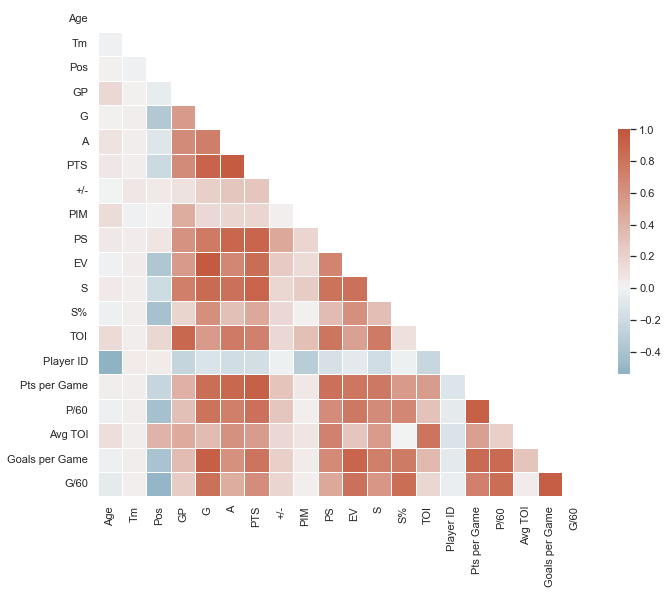

In [506]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#['crs_elapsed_time', 'day', 'month', 'speed', ]

<function matplotlib.pyplot.show(close=None, block=None)>

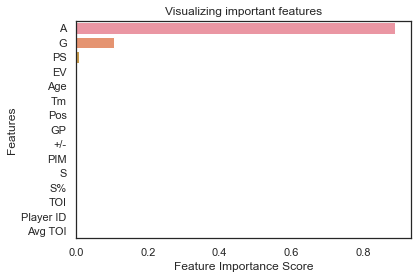

In [550]:
# Creating sns bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing important features")

plt.show

In [502]:
X = data[['Pts per Game','P/60','Goals per Game','G/60']]
y = data['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=69)

rfr = RandomForestRegressor(n_estimators = 100,max_depth = 5,random_state=69)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=69)

In [497]:
data

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
0,Craig Adams,28,1,1,67,10,11,21,1,51,...,8,68,14.7,824,2,0.313,1.529,12.299,0.149,0.728
1,Kevyn Adams,31,1,2,82,15,8,23,0,36,...,13,160,9.4,1057,3,0.280,1.306,12.890,0.183,0.851
2,Dmitry Afanasenkov,25,2,3,68,9,6,15,-7,16,...,8,78,11.5,662,4,0.221,1.360,9.735,0.132,0.816
3,Maxim Afinogenov,26,3,1,77,22,51,73,6,84,...,11,241,9.1,1258,5,0.948,3.482,16.338,0.286,1.049
4,Tommy Albelin,41,4,4,36,0,6,6,4,2,...,0,15,0.0,503,6,0.167,0.716,13.972,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,Trevor Zegras,19,32,2,24,3,10,13,6,12,...,3,53,5.7,370,2777,0.542,2.108,15.417,0.125,0.486
11750,Mika Zibanejad,27,23,2,56,24,26,50,2,18,...,12,171,14.0,1126,1651,0.893,2.664,20.107,0.429,1.279
11751,Artem Zub,25,6,4,47,3,11,14,4,26,...,3,39,7.7,864,2779,0.298,0.972,18.383,0.064,0.208
11752,Mats Zuccarello,33,26,3,42,11,24,35,9,8,...,8,74,14.9,701,1536,0.833,2.996,16.690,0.262,0.942


In [503]:
y_pred = rfr.predict(X_test)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_test, y_pred)))

y_pred = rfr.predict(X_train)
print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_train, y_pred)))

Model accuracy score with 10 decision-trees: 0.8673
Model accuracy score with 10 decision-trees: 0.8747


In [504]:
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Pts per Game      0.982666
P/60              0.011953
G/60              0.002914
Goals per Game    0.002467
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

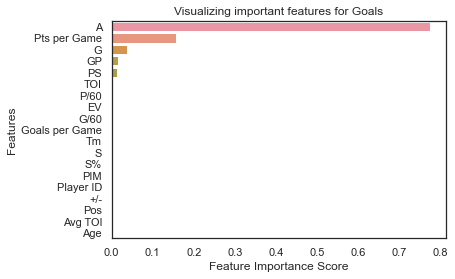

In [545]:
# Creating sns bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing important features for Goals")

plt.show

# (the)

In [143]:
fetch('Auston Matthews')

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
8447,Auston Matthews,19,TOR,C,82,40,29,69,2,14,...,32,279,14.3,1446,2237,0.841,2.863,17.634,0.488,1.660
9209,Auston Matthews,20,TOR,C,62,34,29,63,25,12,...,29,187,18.2,1124,2237,1.016,3.363,18.129,0.548,1.815
9985,Auston Matthews,21,TOR,C,68,37,36,73,-9,12,...,25,251,14.7,1262,2237,1.074,3.471,18.559,0.544,1.759
10735,Auston Matthews,22,TOR,C,70,47,33,80,19,8,...,35,290,16.2,1468,2237,1.143,3.270,20.971,0.671,1.921
11471,Auston Matthews,23,TOR,C,52,41,25,66,21,10,...,31,222,18.5,1121,2237,1.269,3.533,21.558,0.788,2.194


In [177]:
growth('Mitch Marner')

Pts per Game      1.072183
P/60              1.031646
Goals per Game    1.343173
G/60              1.288742
dtype: float64

In [160]:
last_2('Auston Matthews')

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
10735,Auston Matthews,22,TOR,C,70,47,33,80,19,8,...,35,290,16.2,1468,2237,1.143,3.270,20.971,0.671,1.921
11471,Auston Matthews,23,TOR,C,52,41,25,66,21,10,...,31,222,18.5,1121,2237,1.269,3.533,21.558,0.788,2.194


# Regression

In [20]:
values = df

encoder = ce.OrdinalEncoder(cols=['Tm', 'Pos'])

values = encoder.fit_transform(values)

values = values.drop('Player', axis=1)

values

,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
0,28,1,1,67,10,11,21,1,51,1.6,8,68,14.7,824,2,0.313,1.529,12.299,0.149,0.728
1,31,1,2,82,15,8,23,0,36,1.8,13,160,9.4,1057,3,0.280,1.306,12.890,0.183,0.851
2,25,2,3,68,9,6,15,-7,16,1.0,8,78,11.5,662,4,0.221,1.360,9.735,0.132,0.816
3,26,3,1,77,22,51,73,6,84,7.4,11,241,9.1,1258,5,0.948,3.482,16.338,0.286,1.049
4,41,4,4,36,0,6,6,4,2,1.6,0,15,0.0,503,6,0.167,0.716,13.972,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11749,19,32,2,24,3,10,13,6,12,1.4,3,53,5.7,370,2777,0.542,2.108,15.417,0.125,0.486
11750,27,23,2,56,24,26,50,2,18,5.7,12,171,14.0,1126,1651,0.893,2.664,20.107,0.429,1.279
11751,25,6,4,47,3,11,14,4,26,2.8,3,39,7.7,864,2779,0.298,0.972,18.383,0.064,0.208
11752,33,26,3,42,11,24,35,9,8,3.9,8,74,14.9,701,1536,0.833,2.996,16.690,0.262,0.942


In [21]:
X = values.drop('PTS', axis=1)
y = np.array(values['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=11)

reg = LinearRegression()
reg.fit(X_train, y_train)


print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

Train R2: 1.0
Test R2: 1.0


In [22]:
y_pred = reg.predict(X_test)

print('Coefficients:', reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R2): %.2f' % r2_score(y_test, y_pred))

Coefficients: [ 2.72757768e-16 -6.48786580e-16 -5.53359928e-15 -6.76786101e-16
  1.00000000e+00  1.00000000e+00 -1.43933090e-15 -1.34408543e-15
  1.10019775e-15 -2.69128572e-16 -2.93486752e-16  3.99094608e-16
 -5.01985606e-17 -4.85722573e-17 -1.09184357e-14  1.03846758e-15
 -1.33083784e-15  1.76380494e-14 -2.59355890e-15]
Intercept: 2.3803181647963356e-13
Mean squared error (MSE): 0.00
Coefficient of determination (R2): 1.00


C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

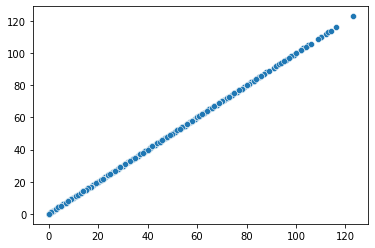

In [23]:
sns.scatterplot(y_test, y_pred)

In [24]:
X = values[['Pts per Game','P/60','Goals per Game','G/60']]
y = np.array(values['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=11)

reg = LinearRegression()
reg.fit(X_train, y_train)


print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

Train R2: 0.8584259838810292
Test R2: 0.8697181370710325


In [25]:
y_pred = reg.predict(X_test)

print('Coefficients:', reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R2): %.2f' % r2_score(y_test, y_pred))

Coefficients: [84.84076559 -6.49081561 25.85926788 -3.45693196]
Intercept: -1.145082322053394
Mean squared error (MSE): 56.51
Coefficient of determination (R2): 0.87


C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Points Scored (R2 = 0.87)')

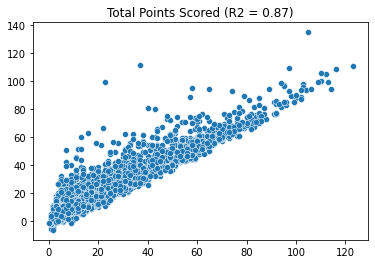

In [26]:
sns.scatterplot(y_test, y_pred)
plt.title("Total Points Scored (R2 = 0.87)")

In [27]:
Xg = values[['Pts per Game','P/60','Goals per Game','G/60']]
yg = np.array(values['G'])

X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.3, shuffle=True, random_state=11)

reg1 = LinearRegression()
reg1.fit(X_train, y_train)


print("Train R2:", reg1.score(X_train, y_train))
print("Test R2:", reg1.score(X_test, y_test))

Train R2: 0.880666432589549
Test R2: 0.8814908874844332


In [28]:
y_pred = reg1.predict(X_test)

print('Coefficients:', reg1.coef_)
print("Intercept:", reg1.intercept_)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R2): %.2f' % r2_score(y_test, y_pred))

Coefficients: [ -4.20742726   1.54011214 105.52813827 -11.6396987 ]
Intercept: -0.36906011047274667
Mean squared error (MSE): 9.65
Coefficient of determination (R2): 0.88


C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Goals Scored (R2 = 0.88)')

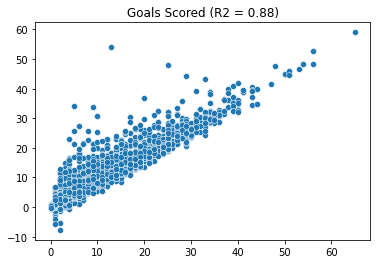

In [29]:
sns.scatterplot(y_test, y_pred)
plt.title("Goals Scored (R2 = 0.88)")

In [23]:
Xg

,Pts per Game,P/60,Goals per Game,G/60
0,0.313,1.529,0.149,0.728
1,0.280,1.306,0.183,0.851
2,0.221,1.360,0.132,0.816
3,0.948,3.482,0.286,1.049
4,0.167,0.716,0.000,0.000
...,...,...,...,...
11749,0.542,2.108,0.125,0.486
11750,0.893,2.664,0.429,1.279
11751,0.298,0.972,0.064,0.208
11752,0.833,2.996,0.262,0.942


In [30]:
CoefficientsG = reg1.coef_
CoefficientsG

array([ -4.20742726,   1.54011214, 105.52813827, -11.6396987 ])

In [31]:
Coefficients = reg.coef_
Coefficients

array([84.84076559, -6.49081561, 25.85926788, -3.45693196])

In [390]:
X

,Pts per Game,P/60,Goals per Game,G/60
0,0.313,1.529,0.149,0.728
1,0.280,1.306,0.183,0.851
2,0.221,1.360,0.132,0.816
3,0.948,3.482,0.286,1.049
4,0.167,0.716,0.000,0.000
...,...,...,...,...
11749,0.542,2.108,0.125,0.486
11750,0.893,2.664,0.429,1.279
11751,0.298,0.972,0.064,0.208
11752,0.833,2.996,0.262,0.942


In [26]:
growth('Victor Hedman')

Pts per Game      1.000000
P/60              0.961020
Goals per Game    1.000000
G/60              0.959135
dtype: float64

In [32]:
def predict(player):
    #fetch(player).iloc[-1]
    points = round((fetch(player).iloc[-1]['Pts per Game']*Coefficients[0]*growth(player)[0]
                  + fetch(player).iloc[-1]['P/60']*Coefficients[1]*growth(player)[1]
                  + fetch(player).iloc[-1]['Goals per Game']*Coefficients[2]*growth(player)[2]
                  + fetch(player).iloc[-1]['G/60']*Coefficients[3]*growth(player)[3]), 0)
    print_p = print(f"{player}'s predicted point total for next season:", points)
    
    goals = round((fetch(player).iloc[-1]['Pts per Game']*CoefficientsG[0]*growth(player)[0]
                  + fetch(player).iloc[-1]['P/60']*CoefficientsG[1]*growth(player)[1]
                  + fetch(player).iloc[-1]['Goals per Game']*CoefficientsG[2]*growth(player)[2]
                  + fetch(player).iloc[-1]['G/60']*CoefficientsG[3]*growth(player)[3]), 0)
    print_g = print(f"{player}'s predicted goal total for next season:", goals)
    
    return print_p, goals

def points(player):
    points = round((fetch(player).iloc[-1]['Pts per Game']*Coefficients[0]*growth(player)[0]
                  + fetch(player).iloc[-1]['P/60']*Coefficients[1]*growth(player)[1]
                  + fetch(player).iloc[-1]['Goals per Game']*Coefficients[2]*growth(player)[2]
                  + fetch(player).iloc[-1]['G/60']*Coefficients[3]*growth(player)[3]), 0)
    return points

def goals(player):
    goals = round((fetch(player).iloc[-1]['Pts per Game']*CoefficientsG[0]*growth(player)[0]
                  + fetch(player).iloc[-1]['P/60']*CoefficientsG[1]*growth(player)[1]
                  + fetch(player).iloc[-1]['Goals per Game']*CoefficientsG[2]*growth(player)[2]
                  + fetch(player).iloc[-1]['G/60']*CoefficientsG[3]*growth(player)[3]), 0)
    return goals

In [236]:
fetch('Auston Matthews').iloc[-1]['P/60']

3.533

In [239]:
Coefficients[0]

84.84076558772695

In [33]:
predict('Sidney Crosby')

Sidney Crosby's predicted point total for next season: 81.0
Sidney Crosby's predicted goal total for next season: 35.0


(None, 35.0)

In [34]:
test = test.drop('Unnamed: 0', axis=1)

In [35]:
test = test.pipe(goals_per_game).pipe(goals_per_60)
test

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
0,Noel Acciari,30,FLA,C,20,3,5,8,2,11,0.6,3,32,9.4,240,0.400,2.000,12.000,0.150,0.750
1,Calen Addison,21,MIN,D,15,2,2,4,-4,2,0.3,2,17,11.8,207,0.267,1.159,13.800,0.133,0.580
2,Sebastian Aho,24,CAR,F,79,37,44,81,18,38,9.4,23,221,16.7,1497,1.025,3.246,18.949,0.468,1.483
3,Sebastian Aho,25,NYI,D,36,2,10,12,-6,10,1.7,2,34,5.9,592,0.333,1.216,16.444,0.056,0.203
4,Michael Amadio,25,TOT,C,56,11,7,18,1,15,1.7,11,64,17.2,681,0.321,1.586,12.161,0.196,0.969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Mika Zibanejad,28,NYR,C,81,29,52,81,30,12,9.2,13,219,13.2,1591,1.000,3.055,19.642,0.358,1.094
804,Radim Zohorna,25,PIT,F,17,2,4,6,12,4,0.9,2,9,22.2,176,0.353,2.045,10.353,0.118,0.682
805,Artem Zub,26,OTT,D,81,6,16,22,1,60,4.9,6,92,6.5,1704,0.272,0.775,21.037,0.074,0.211
806,Mats Zuccarello,34,MIN,LW,70,24,55,79,21,24,7.9,17,159,15.1,1301,1.129,3.643,18.586,0.343,1.107


In [36]:
top_points = pd.DataFrame(test.sort_values('PTS', ascending=False).head(10))
top_goals = pd.DataFrame(test.sort_values('G', ascending=False).head(10))

In [33]:
top_goals.at['Auston Matthews', 'Predicted Goals'] = 68.0

In [38]:
#top_goals = top_goals.drop('id', axis=1)
#top_goals = top_goals.drop('Unnamed: 0', axis=1)
top_goals 

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
476,Auston Matthews,24,TOR,C,73,60,46,106,20,18,13.7,44,348,17.2,1505,1.452,4.226,20.616,0.822,2.392
178,Leon Draisaitl,26,EDM,C,80,55,55,110,17,40,13.2,30,278,19.8,1788,1.375,3.691,22.350,0.688,1.846
391,Chris Kreider,30,NYR,LW,81,52,25,77,19,24,10.7,23,258,20.2,1517,0.951,3.045,18.728,0.642,2.057
556,Alex Ovechkin,36,WSH,LW,77,50,40,90,8,18,11.3,33,334,15.0,1584,1.169,3.409,20.571,0.649,1.894
363,Kirill Kaprizov,24,MIN,LW,81,47,61,108,27,34,12.6,33,289,16.3,1548,1.333,4.186,19.111,0.580,1.822
141,Kyle Connor,25,WPG,LW,79,47,46,93,-3,4,10.5,36,317,14.8,1720,1.177,3.244,21.772,0.595,1.640
486,Connor McDavid,25,EDM,C,80,44,79,123,28,45,13.8,34,314,14.0,1765,1.538,4.181,22.062,0.550,1.496
184,Matt Duchene,31,NSH,C,78,43,43,86,6,38,9.9,27,228,18.9,1483,1.103,3.479,19.013,0.551,1.740
748,Matthew Tkachuk,24,CGY,LW,82,42,62,104,57,68,13.5,30,253,16.6,1468,1.268,4.251,17.902,0.512,1.717
704,Steven Stamkos,31,TBL,C,81,42,64,106,24,36,12.4,26,241,17.4,1497,1.309,4.248,18.481,0.519,1.683


In [40]:
top_goals['Predicted Goals'] = [68.0, 37.0, 28.0, 28.0, None, 27.0, 48.0, 10.0, 17.0, 27.0]

In [540]:
goals('Auston Matthews')

68.0

In [41]:
top_goals

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV,S,S%,TOI,Pts per Game,P/60,Avg TOI,Goals per Game,G/60,Predicted Goals
476,Auston Matthews,24,TOR,C,73,60,46,106,20,18,...,44,348,17.2,1505,1.452,4.226,20.616,0.822,2.392,68.0
178,Leon Draisaitl,26,EDM,C,80,55,55,110,17,40,...,30,278,19.8,1788,1.375,3.691,22.350,0.688,1.846,37.0
391,Chris Kreider,30,NYR,LW,81,52,25,77,19,24,...,23,258,20.2,1517,0.951,3.045,18.728,0.642,2.057,28.0
556,Alex Ovechkin,36,WSH,LW,77,50,40,90,8,18,...,33,334,15.0,1584,1.169,3.409,20.571,0.649,1.894,28.0
363,Kirill Kaprizov,24,MIN,LW,81,47,61,108,27,34,...,33,289,16.3,1548,1.333,4.186,19.111,0.580,1.822,NaN
141,Kyle Connor,25,WPG,LW,79,47,46,93,-3,4,...,36,317,14.8,1720,1.177,3.244,21.772,0.595,1.640,27.0
486,Connor McDavid,25,EDM,C,80,44,79,123,28,45,...,34,314,14.0,1765,1.538,4.181,22.062,0.550,1.496,48.0
184,Matt Duchene,31,NSH,C,78,43,43,86,6,38,...,27,228,18.9,1483,1.103,3.479,19.013,0.551,1.740,10.0
748,Matthew Tkachuk,24,CGY,LW,82,42,62,104,57,68,...,30,253,16.6,1468,1.268,4.251,17.902,0.512,1.717,17.0
704,Steven Stamkos,31,TBL,C,81,42,64,106,24,36,...,26,241,17.4,1497,1.309,4.248,18.481,0.519,1.683,27.0


In [47]:
#top_points = top_points.drop('Unnamed: 0', axis=1)
top_points

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
486,Connor McDavid\mcdavco01,25,EDM,C,80,44,79,123,28,45,13.8,34,314,14.0,1765,1.538,4.181,22.062,0.550,1.496
318,Jonathan Huberdeau\huberjo01,28,FLA,LW,80,30,85,115,35,54,11.9,22,222,13.5,1555,1.438,4.437,19.438,0.375,1.158
245,Johnny Gaudreau\gaudrjo01,28,CGY,LW,82,40,75,115,64,26,14.6,34,262,15.3,1523,1.402,4.531,18.573,0.488,1.576
178,Leon Draisaitl\draisle01,26,EDM,C,80,55,55,110,17,40,13.2,30,278,19.8,1788,1.375,3.691,22.350,0.688,1.846
363,Kirill Kaprizov\kapriki01,24,MIN,LW,81,47,61,108,27,34,12.6,33,289,16.3,1548,1.333,4.186,19.111,0.580,1.822
476,Auston Matthews\matthau01,24,TOR,C,73,60,46,106,20,18,13.7,44,348,17.2,1505,1.452,4.226,20.616,0.822,2.392
704,Steven Stamkos\stamkst01,31,TBL,C,81,42,64,106,24,36,12.4,26,241,17.4,1497,1.309,4.248,18.481,0.519,1.683
748,Matthew Tkachuk\tkachma01,24,CGY,LW,82,42,62,104,57,68,13.5,30,253,16.6,1468,1.268,4.251,17.902,0.512,1.717
509,J.T. Miller\millejt01,28,VAN,C,80,32,67,99,15,47,10.6,24,206,15.5,1686,1.238,3.523,21.075,0.400,1.139
470,Mitch Marner\marnemi01,24,TOR,RW,72,35,62,97,23,16,10.6,26,224,15.6,1504,1.347,3.870,20.889,0.486,1.396


In [42]:
top_points['Predicted Points'] = [167.0, 75.0, 65.0, 106.0, None, 110.0, 49.0, 46.0, 52.0, 97.0]

In [43]:
points('Mitch Marner')

97.0

In [44]:
goals_table = pd.DataFrame(top_goals, columns=['Player','Age','Tm','Pos','GP','G','A','PTS','Predicted Goals'])

In [45]:
goals_table['Model Error'] = goals_table['Predicted Goals'] - goals_table['G']

In [46]:
goals_table

,Player,Age,Tm,Pos,GP,G,A,PTS,Predicted Goals,Model Error
476,Auston Matthews,24,TOR,C,73,60,46,106,68.0,8.0
178,Leon Draisaitl,26,EDM,C,80,55,55,110,37.0,-18.0
391,Chris Kreider,30,NYR,LW,81,52,25,77,28.0,-24.0
556,Alex Ovechkin,36,WSH,LW,77,50,40,90,28.0,-22.0
363,Kirill Kaprizov,24,MIN,LW,81,47,61,108,NaN,NaN
141,Kyle Connor,25,WPG,LW,79,47,46,93,27.0,-20.0
486,Connor McDavid,25,EDM,C,80,44,79,123,48.0,4.0
184,Matt Duchene,31,NSH,C,78,43,43,86,10.0,-33.0
748,Matthew Tkachuk,24,CGY,LW,82,42,62,104,17.0,-25.0
704,Steven Stamkos,31,TBL,C,81,42,64,106,27.0,-15.0


In [47]:
points_table = pd.DataFrame(top_points, columns=['Player','Age','Tm','Pos','GP','G','A','PTS','Predicted Points'])

In [48]:
points_table['Model Error'] = points_table['Predicted Points'] - points_table['PTS']

In [49]:
points_table

,Player,Age,Tm,Pos,GP,G,A,PTS,Predicted Points,Model Error
486,Connor McDavid,25,EDM,C,80,44,79,123,167.0,44.0
318,Jonathan Huberdeau,28,FLA,LW,80,30,85,115,75.0,-40.0
245,Johnny Gaudreau,28,CGY,LW,82,40,75,115,65.0,-50.0
178,Leon Draisaitl,26,EDM,C,80,55,55,110,106.0,-4.0
363,Kirill Kaprizov,24,MIN,LW,81,47,61,108,NaN,NaN
476,Auston Matthews,24,TOR,C,73,60,46,106,110.0,4.0
704,Steven Stamkos,31,TBL,C,81,42,64,106,49.0,-57.0
748,Matthew Tkachuk,24,CGY,LW,82,42,62,104,46.0,-58.0
509,J.T. Miller,28,VAN,C,80,32,67,99,52.0,-47.0
470,Mitch Marner,24,TOR,RW,72,35,62,97,97.0,0.0


In [568]:
last_2('Sidney Crosby')

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV,S,S%,TOI,Player ID,Pts per Game,P/60,Avg TOI,Goals per Game,G/60
10417,Sidney Crosby,32,PIT,C,41,16,31,47,-8,15,...,12,109,14.7,831,140,1.146,3.394,20.268,0.390,1.155
11163,Sidney Crosby,33,PIT,C,55,24,38,62,8,26,...,18,159,15.1,1122,140,1.127,3.316,20.400,0.436,1.283


In [569]:
growth('Sidney Crosby')

Pts per Game      0.983421
P/60              0.977018
Goals per Game    1.117949
G/60              1.110823
dtype: float64

In [577]:
predict("Sidney Crosby")

Sidney Crosby's predicted point total for next season: 81.0
Sidney Crosby's predicted goal total for next season: 35.0


(None, 35.0)

In [580]:
test[test['Player'] == 'Sidney Crosby'][['Player','G','A','PTS']]

,Player,G,A,PTS
148,Sidney Crosby,31,53,84


In [50]:
top_goals['id'] = None
top_goals[['Player', 'id']] = top_goals.Player.str.split('\\',expand=True)
top_goals = top_goals.drop('id', axis=1)
top_goals

ValueError: Columns must be same length as key

In [62]:
top_points['id'] = None
top_points[['Player', 'id']] = top_points.Player.str.split('\\',expand=True)
top_points = top_points.drop('id', axis=1)
top_points

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV,S,S%,TOI,Pts per Game,P/60,Avg TOI,Goals per Game,G/60,Predicted Points
486,Connor McDavid,25,EDM,C,80,44,79,123,28,45,...,34,314,14.0,1765,1.538,4.181,22.062,0.550,1.496,167.0
318,Jonathan Huberdeau,28,FLA,LW,80,30,85,115,35,54,...,22,222,13.5,1555,1.438,4.437,19.438,0.375,1.158,75.0
245,Johnny Gaudreau,28,CGY,LW,82,40,75,115,64,26,...,34,262,15.3,1523,1.402,4.531,18.573,0.488,1.576,65.0
178,Leon Draisaitl,26,EDM,C,80,55,55,110,17,40,...,30,278,19.8,1788,1.375,3.691,22.350,0.688,1.846,106.0
363,Kirill Kaprizov,24,MIN,LW,81,47,61,108,27,34,...,33,289,16.3,1548,1.333,4.186,19.111,0.580,1.822,NaN
476,Auston Matthews,24,TOR,C,73,60,46,106,20,18,...,44,348,17.2,1505,1.452,4.226,20.616,0.822,2.392,110.0
704,Steven Stamkos,31,TBL,C,81,42,64,106,24,36,...,26,241,17.4,1497,1.309,4.248,18.481,0.519,1.683,49.0
748,Matthew Tkachuk,24,CGY,LW,82,42,62,104,57,68,...,30,253,16.6,1468,1.268,4.251,17.902,0.512,1.717,46.0
509,J.T. Miller,28,VAN,C,80,32,67,99,15,47,...,24,206,15.5,1686,1.238,3.523,21.075,0.400,1.139,52.0
470,Mitch Marner,24,TOR,RW,72,35,62,97,23,16,...,26,224,15.6,1504,1.347,3.870,20.889,0.486,1.396,97.0


# Stuff

In [52]:
goals_table

,Player,Age,Tm,Pos,GP,G,A,PTS,Predicted Goals,Model Error
476,Auston Matthews,24,TOR,C,73,60,46,106,68.0,8.0
178,Leon Draisaitl,26,EDM,C,80,55,55,110,37.0,-18.0
391,Chris Kreider,30,NYR,LW,81,52,25,77,28.0,-24.0
556,Alex Ovechkin,36,WSH,LW,77,50,40,90,28.0,-22.0
363,Kirill Kaprizov,24,MIN,LW,81,47,61,108,NaN,NaN
141,Kyle Connor,25,WPG,LW,79,47,46,93,27.0,-20.0
486,Connor McDavid,25,EDM,C,80,44,79,123,48.0,4.0
184,Matt Duchene,31,NSH,C,78,43,43,86,10.0,-33.0
748,Matthew Tkachuk,24,CGY,LW,82,42,62,104,17.0,-25.0
704,Steven Stamkos,31,TBL,C,81,42,64,106,27.0,-15.0


In [53]:
points_table

,Player,Age,Tm,Pos,GP,G,A,PTS,Predicted Points,Model Error
486,Connor McDavid,25,EDM,C,80,44,79,123,167.0,44.0
318,Jonathan Huberdeau,28,FLA,LW,80,30,85,115,75.0,-40.0
245,Johnny Gaudreau,28,CGY,LW,82,40,75,115,65.0,-50.0
178,Leon Draisaitl,26,EDM,C,80,55,55,110,106.0,-4.0
363,Kirill Kaprizov,24,MIN,LW,81,47,61,108,NaN,NaN
476,Auston Matthews,24,TOR,C,73,60,46,106,110.0,4.0
704,Steven Stamkos,31,TBL,C,81,42,64,106,49.0,-57.0
748,Matthew Tkachuk,24,CGY,LW,82,42,62,104,46.0,-58.0
509,J.T. Miller,28,VAN,C,80,32,67,99,52.0,-47.0
470,Mitch Marner,24,TOR,RW,72,35,62,97,97.0,0.0


In [54]:
predict("Mitch Marner")

Mitch Marner's predicted point total for next season: 97.0
Mitch Marner's predicted goal total for next season: 37.0


(None, 37.0)

In [56]:
predict('Auston Matthews')

Auston Matthews's predicted point total for next season: 110.0
Auston Matthews's predicted goal total for next season: 68.0


(None, 68.0)